## Loading Oxford Instruments AZTEC (E02-EDX) data into hyperspy  

You will need to have exported your AZTEC EDX data both to rpl / raw format and also to h5oina files for this notbook to work.

The data is read from rpl / raw and the metadata from h5oina files.


In [3]:
%matplotlib widget 
import hyperspy.api as hs
import os
from glob import glob
import h5py as h5
import matplotlib.pyplot as plt

In [4]:
hs.print_known_signal_types()

signal_type,aliases,class name,package
beam_shift,,BeamShift,pyxem
correlation,,Correlation1D,pyxem
correlation,,Correlation2D,pyxem
dpc,,DPCBaseSignal,pyxem
dpc,,DPCSignal1D,pyxem
dpc,,DPCSignal2D,pyxem
DielectricFunction,dielectric function,DielectricFunction,exspy
diffraction,,Diffraction1D,pyxem
diffraction,,Diffraction2D,pyxem
diffraction_variance,,DiffractionVariance1D,pyxem


In [2]:
#Use %matplotlib qt5 to have the figures pop out from notebook
#Change directory to the folder containing the exported raw /rpl files and also the calibration STEM image.

In [3]:
#'/dls/e02/data/2025/mg41593-1/EDX/

In [2]:
rpl_raW_path ='/dls/e02/data/2025/mg41593-1/EDX/'
raw_list = glob(rpl_raW_path + '*.raw')
#'/dls/science/groups/e02/Sample_data/E02_EDX_rpl_raw'
#os.chdir(path)
for i, this_raw in enumerate(raw_list):
    print(i, this_raw)

0 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 12 - EDS Data Map_002.raw
1 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 1 - EDS Data Map_001.raw
2 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 4 - EDS Data Map_003.raw
3 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 14 - EDS Data Map_004.raw
4 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 11 - EDS Data Map_001.raw
5 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 3 - EDS Data Map_002.raw
6 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 16 - EDS Data Map_005.raw
7 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 5 - EDS Data Map_004.raw
8 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 15 - EDS Data Map_005.raw
9 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 6 - EDS Data Map_005.raw
10 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 7 - EDS Data Map_006.raw
11 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 8 - EDS Data Map_007.raw
12 /dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 9 - EDS Data Map_007.raw
13 /dls/e02/data/2025/mg41593-1/EDX/EDS Map

In [3]:
img_list = glob(rpl_raW_path + '/**/*.png', recursive = True )
for i, this_img in enumerate(img_list):
    print(i, this_img)

0 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 7.png
1 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 1.png
2 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 10.png
3 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 12.png
4 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 8.png
5 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 5.png
6 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 6.png
7 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 13.png
8 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 11.png
9 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 9.png
10 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 15.png
11 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 4.png
12 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 16.png
13 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 14.png
14 /dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 3.png
15 /dls/e02/data/2025/mg41593-1/EDX/Autolock Image 6 (HAADF) BSE/Autolock Image 6 (HAADF) BSE_005.png.p

In [4]:
h5_list= glob(rpl_raW_path + '/**/*.h5oina', recursive = True )
for i, this_h5 in enumerate(h5_list):
    print(i, this_h5)

0 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_SP Site 7 Map Data 9.h5oina
1 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_ST Site 3 Map Data 13.h5oina
2 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_SP Site 6 Map Data 7.h5oina
3 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_SP Site 7 Map Data 8.h5oina
4 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_SP Site 7 Map Data 10.h5oina
5 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_ST Site 4 Map Data 14.h5oina
6 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_SP Site 3 Map Data 4.h5oina
7 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_SP Site 1 Map Data 1.h5oina
8 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_SP Site 2 Map Data 3.h5oina
9 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_SP Site 5 Map Data 6.h5oina
10 /dls/e02/data/2025/mg41593-1/EDX/h5oina/Project 1 E25_081311_ST Site 5 Map Data 15.h

In [5]:
#BEWARE - the 'electron image' number does not necessarily match the data number- please cross reference with 'layered' images!
#for this data set electron image dat-set number +=1.
data_set_number = 1
layered_img_file = glob(rpl_raW_path + '/**/* Layered Image '+str(data_set_number) +'.png*', recursive = True )
print('layered image path(s) : ',*layered_img_file, sep = '\n')
img_file =  glob(rpl_raW_path + '/**/*Electron Image '+str(data_set_number+1) +' *.png*', recursive = True )
print('img file path(s) : ',*img_file, sep = '\n')
rpl_file =  glob(rpl_raW_path + '*Map Data ' + str(data_set_number) + ' *.rpl')
print('rpl file path(s) : ', *rpl_file, sep= '\n')
h5oina_file =  glob(rpl_raW_path + '/**/h5oina/*Map Data ' + str(data_set_number) + '.h5oina')
print('h5oina file path(s) : ', *h5oina_file, sep = '\n')

layered image path(s) : 
/dls/e02/data/2025/mg41593-1/EDX/EDS Layered Image 1.png
img file path(s) : 
/dls/e02/data/2025/mg41593-1/EDX/Electron Image 2 (HAADF) BSE/Electron Image 2 (HAADF) BSE_001.png.png
rpl file path(s) : 
/dls/e02/data/2025/mg41593-1/EDX/EDS Map Data 1 - EDS Data Map_001.rpl
h5oina file path(s) : 
/dls/e02/data/2025/mg41593-1/EDX/Project 1/h5oina/Project 1 E25_081311_SP Site 1 Map Data 1.h5oina


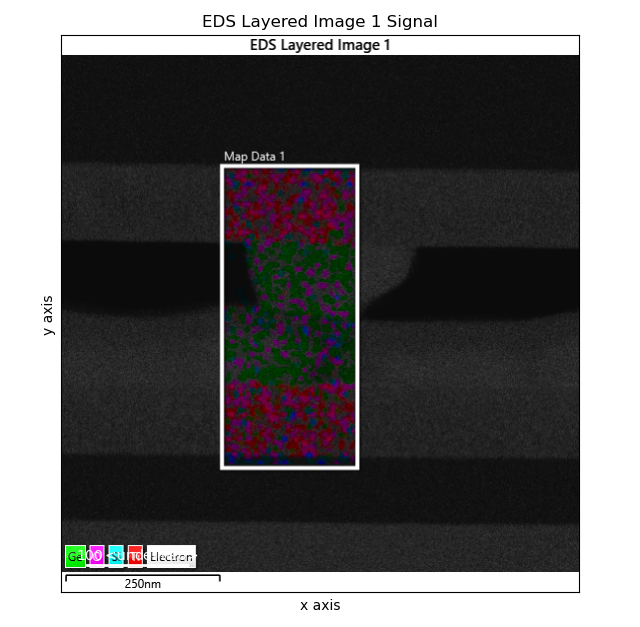

In [6]:
#show manually saved layered image
layered_image = hs.load(layered_img_file)
layered_image.plot()

**HAADF image from the same area at the same MAG used for MAG calibration**

In [7]:
image = hs.load(img_file)#[1])
#image_ROI = hs.load(img_file[0]) # for these data sets I also manually saved the images with ROI overlay
image

<Signal2D, title: , dimensions: (|512, 512)>

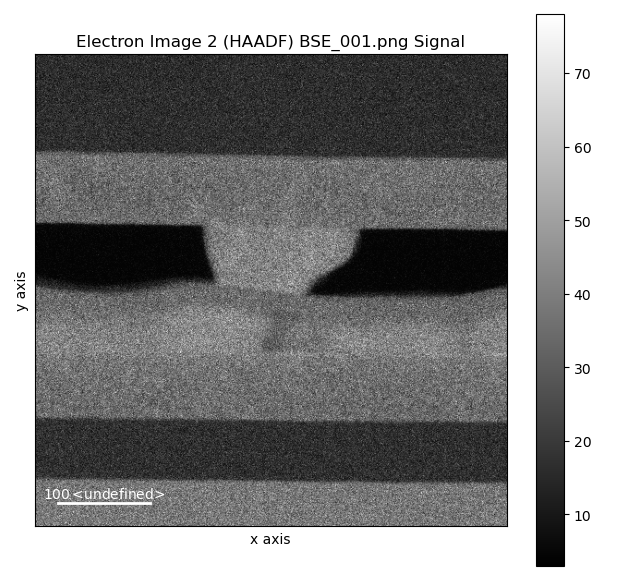

In [8]:
image.plot()


In [9]:
image.axes_manager

Signal axis name,size,,offset,scale,units
x,512,,0.0,1.0,
y,512,,0.0,1.0,


In [10]:
edx = hs.load(rpl_file)

In [11]:
edx = edx.transpose()
edx

<Signal1D, title: , dimensions: (134, 299|2048)>

In [12]:
edx.axes_manager

Navigation axis name,size,index,offset,scale,units
width,134,0,0.0,1.0,
height,299,0,0.0,1.0,
Signal axis name,size,,offset,scale,units
depth,2048,,0.0,1.0,


In [13]:
edx.set_signal_type('EDS_TEM')

In [14]:
edx

<EDSTEMSpectrum, title: , dimensions: (134, 299|2048)>

In [15]:
#should now have labelled the axes correctly but doesn't seem to have - this is a bug
edx.axes_manager

Navigation axis name,size,index,offset,scale,units
width,134,0,0.0,1.0,
height,299,0,0.0,1.0,
Signal axis name,size,,offset,scale,units
depth,2048,,0.0,1.0,


In [16]:
#manually labelling axed
edx.axes_manager[0].name = 'x'
edx.axes_manager[1].name = 'y'
edx.axes_manager[2].name = 'Energy'

In [17]:
edx.axes_manager

Navigation axis name,size,index,offset,scale,units
x,134,0,0.0,1.0,
y,299,0,0.0,1.0,
Signal axis name,size,,offset,scale,units
Energy,2048,,0.0,1.0,


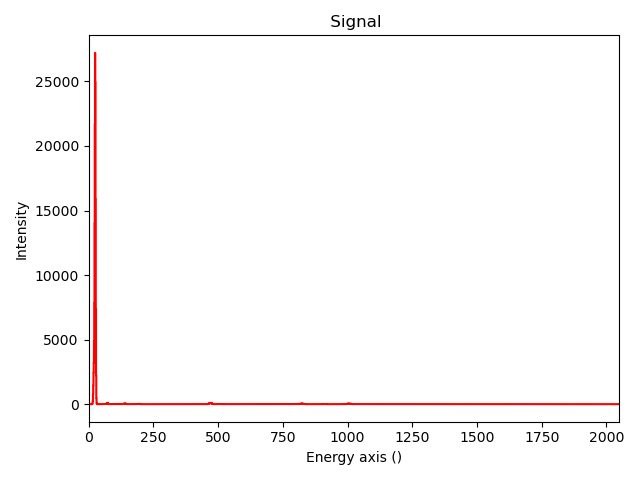

In [18]:
edx.sum().plot()

In [19]:
with h5.File(h5oina_file[0]) as f:
        print(f.keys())#[#'1']['EDS']['Data'].keys())

<KeysViewHDF5 ['1', 'Format Version', 'Index', 'Manufacturer', 'Software Version']>


In [20]:
with h5.File(h5oina_file[0]) as f:
    #print(f['1']['EDS']['Data'].keys())
    # X = f['1']['EDS']['Data']['X'][()]
    # Y = f['1']['EDS']['Data']['Y'][()]
    #print(f['1']['EDS']['Header'].keys())
    print('****** Image Metadata ******')
    for this_key in f['1']['Electron Image']['Header'].keys():
        try:
            print(this_key,  f['1']['Electron Image']['Header'][this_key][()])
        except:
            print(this_key, ': ')#, f['1']['Electron Image']['Header'][this_key].keys())
            nested_keys = f['1']['Electron Image']['Header'][this_key].keys()
            for this_nested_key in nested_keys:
                print('\t', this_nested_key, f['1']['Electron Image']['Header'][this_key][this_nested_key][()])
    img_xy_scale = f['1']['Electron Image']['Header']['X Step'][()]
    print()
    print('****** EDS Metadata ******')
    for this_key in f['1']['EDS']['Header'].keys():
        try:
            print(this_key,  f['1']['EDS']['Header'][this_key][()])
        except:
            print(this_key, ': ')#, f['1']['EDS']['Header'][this_key].keys())
            nested_keys = f['1']['EDS']['Header'][this_key].keys()
            for this_nested_key in nested_keys:
                print('\t', this_nested_key, f['1']['EDS']['Header'][this_key][this_nested_key][()])
    edx_scale = f['1']['EDS']['Header']['Channel Width'][()]
    edx_binning = f['1']['EDS']['Header']['Binning'][()]
    edx_x_scale = f['1']['EDS']['Header']['X Step'][()] / edx_binning[0]
    edx_y_scale = f['1']['EDS']['Header']['Y Step'][()] / edx_binning[0]
    ch_offset = f['1']['EDS']['Header']['Start Channel'][()]
    beam_voltage = f['1']['EDS']['Header']['Beam Voltage'][()]
    edx_position_rel_offset = f['1']['EDS']['Header']['Relative Offset'][()]
    edx_position_rel_size = f['1']['EDS']['Header']['Relative Size'][()]
    print()
    print('****** layered image Metadata ******')
    for this_layered_key in f['1']['Layered Image'].keys():
        for this_key in f['1']['Layered Image'][this_layered_key]['Header'].keys():
            try:
                print(this_key,  f['1']['Layered Image'][this_layered_key]['Header'][this_key][()])
            except:
                print(this_key, ': ')#, f['1']['Layered Image']['EDS Layered Image 4']['Header'][this_key].keys())
                nested_keys = f['1']['Layered Image'][this_layered_key]['Header'][this_key].keys()
                for this_nested_key in nested_keys:
                    print('\t', this_nested_key, f['1']['Layered Image'][this_layered_key]['Header'][this_key][this_nested_key][()])

****** Image Metadata ******
Acquisition Date [b'2025-09-22T17:06:50']
Analysis Label [b'Map Data 1']
Analysis Unique Identifier [b'1519cba2-5cc9-4154-88e4-08ace51928a4']
Beam Voltage [300.]
Bounding Box Size [0.84231067 0.84231067]
Drift Correction [1]
Dwell Time [35.]
Magnification [120000.]
Number Frames Averaged [1]
Project File [b'F:\\Session_data\\mg41593-1\\Project 1\\Project 1.oipx']
Project Label [b'Project 1']
Project Notes [b'']
Relative Offset [0. 0.]
Relative Size [1. 1.]
Site Label [b'Site 1']
Site Notes [b'']
Specimen Label [b'E25_081311_SP']
Specimen Notes [b'']
Stage Position : 
	 Rotation [0.]
	 Tilt [0.]
	 X [0.]
	 Y [0.]
	 Z [0.]
Tilt Angle [0.]
Working Distance [0.]
X Cells [512]
X Step [0.00164514]
Y Cells [512]
Y Step [0.00164514]

****** EDS Metadata ******
Acquisition Date [b'2025-09-22T17:07:16']
Analysis Label [b'Map Data 1']
Analysis Unique Identifier [b'1519cba2-5cc9-4154-88e4-08ace51928a4']
Beam Voltage [300.]
Binning [4]
Bounding Box Size [0.2204485  0.49

**Sorting out the axes / calibrations / scales**

In [21]:
image.axes_manager['x'].scale = img_xy_scale[0]
image.axes_manager['y'].scale = img_xy_scale[0]

image.axes_manager['x'].units = 'um'
image.axes_manager['y'].units = 'um'

In [22]:
image.axes_manager

Signal axis name,size,,offset,scale,units
x,512,,0.0,0.0016451380215585232,um
y,512,,0.0,0.0016451380215585232,um


In [23]:
edx.axes_manager['Energy'].scale = edx_scale[0] * 0.001
edx.axes_manager['Energy'].units = 'keV'
edx.axes_manager['Energy'].offset = ch_offset[0] *edx_scale[0]* 0.0001

**Setting the pixel size calibration. Factor two because the HAADF image is 1024 by 1024 and the map is 512 by 512 pixels.**

In [24]:
edx.axes_manager['x'].scale =edx_x_scale[0]# image.axes_manager['x'].scale*2
edx.axes_manager['y'].scale =edx_y_scale[0] #image.axes_manager['y'].scale*2

In [25]:
edx.axes_manager['x'].units = 'um'
edx.axes_manager['y'].units = 'um'

In [26]:
edx.metadata.Acquisition_instrument.TEM.beam_energy = beam_voltage

In [27]:
edx.axes_manager

Navigation axis name,size,index,offset,scale,units
x,134,0,0.0,0.0016451380215585232,um
y,299,0,0.0,0.0016451380215585232,um
Signal axis name,size,,offset,scale,units
Energy,2048,,-0.19744899902343752,0.010000000953674317,keV


In [28]:
#put ROI bounding box on image. 
print(edx_position_rel_offset)
print(edx_position_rel_size)

[0.1554054  0.10743243]
[0.26081082 0.58513516]


From Oxford Instruments :
 Relative Size : Size of the bounding box of the acquisition in the electron image. The width is normalized by the __ width __ of the electron image. The height is normalized by the __ height __ of the electron image.

Relative Offset: Top-left corner of the bounding box of the acquisition in the electron image. The X coordinate is normalized by the __ width __ of the electron image. The Y coordinate is normalized by the __ height __ of the electron image.

In [29]:
#not sure why left right needs to include a factor of 2 (no matter what binning is in metadata) but top bottom does not!
electron_image_width_height = image.axes_manager['x'].scale * image.axes_manager['x'].size
ROI_left = electron_image_width_height * 2 * edx_position_rel_offset[0]
ROI_right = ROI_left + (electron_image_width_height * edx_position_rel_size[0])
ROI_top = electron_image_width_height * 2 *  edx_position_rel_offset[1]
ROI_bottom = ROI_top + (electron_image_width_height * edx_position_rel_size[1])
print(ROI_left, ROI_right, ROI_top, ROI_bottom)
print(ROI_right - ROI_left, ROI_bottom  - ROI_top)
print(electron_image_width_height)

0.261799255949029 0.4814829936078482 0.18098296771519173 0.6738485562229037
0.2196837376588192 0.492865588507712
0.8423106670379639


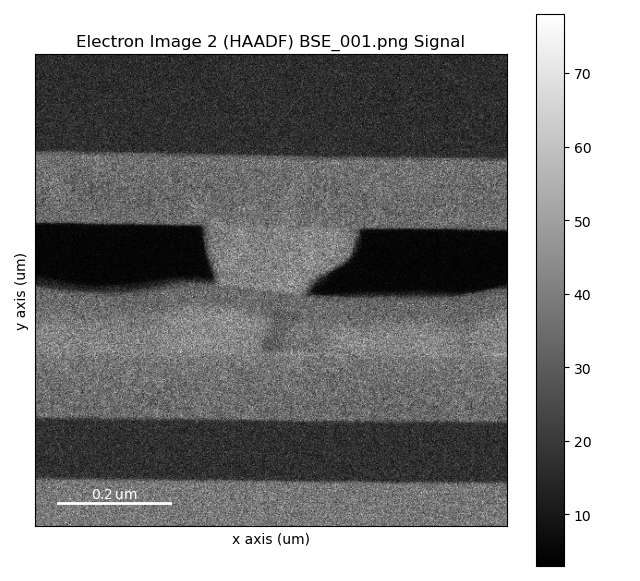

<Signal2D, title: , dimensions: (|134, 300)>

In [30]:
#plot region of scan on image
#ig, axs = plt.subplots(2,1)
image.plot()
map_roi = hs.roi.RectangularROI(left = ROI_left,right =ROI_right,top =ROI_top,bottom = ROI_bottom)#ROI_left, ROI_right, ROI_top, ROI_bottom)#edx_position_offset[0],edx_position_offset[1], edx_position_offset[0] +edx_position_size[0], edx_position_offset[1] +   edx_position_size[1] )
map_roi.interactive(image)

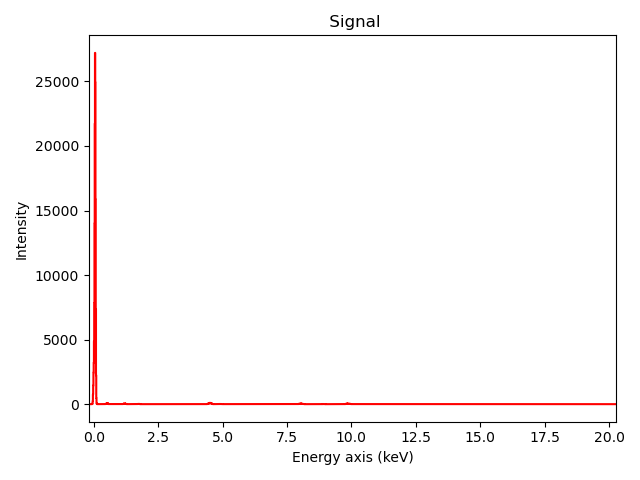

In [31]:
#plot the sum of all the edx data
edx.sum().plot()

In [ ]:
#clear element and line lists if  exists
if edx.metadata.Sample.elements:
    edx.metadata.Sample.elements = []
if edx.metadata.Sample.xray_lines:
    edx.metadata.Sample.xray_lines = []

In [33]:
#add elements and specific lines
edx.add_elements(('Ti', 'Ge', 'O', 'Si'))
edx.set_lines(['Ti_Ka'])

In [34]:
edx.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       └── beam_energy = array([300.], dtype=float32)
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.2.0
│   │       ├── io_plugin = rsciio.ripple
│   │       ├── operation = load
│   │       └── timestamp = 2025-10-10T14:22:32.483670+00:00
│   ├── date = 
│   ├── original_filename = EDS Map Data 1 - EDS Data Map_001.rpl
│   ├── time = 
│   └── title = 
├── Sample
│   ├── elements = ['Ge', 'O', 'Si', 'Ti']
│   └── xray_lines = ['Ge_Ka', 'O_Ka', 'Si_Ka', 'Ti_Ka']
└── Signal
    └── signal_type = EDS_TEM

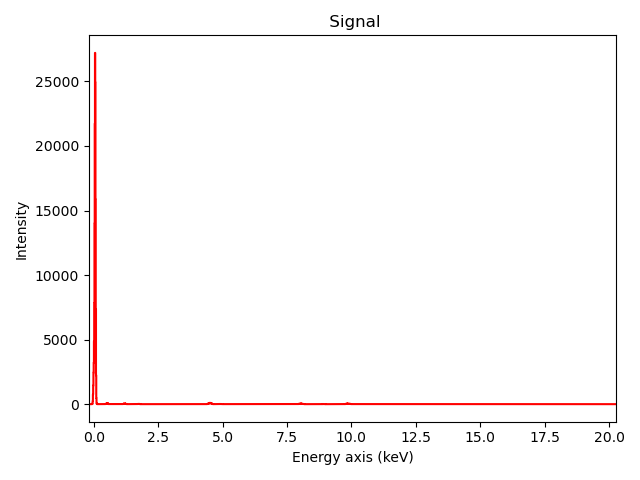

In [35]:
edx.sum().plot(True) # plot with line positions marked

In [36]:
#integrate line intensity to form maps 
maps = edx.get_lines_intensity()

In [37]:
edx.axes_manager

Navigation axis name,size,index,offset,scale,units
x,134,0,0.0,0.0016451380215585232,um
y,299,0,0.0,0.0016451380215585232,um
Signal axis name,size,,offset,scale,units
Energy,2048,,-0.19744899902343752,0.010000000953674317,keV


In [38]:
maps

[<BaseSignal, title: X-ray line intensity of : Ge_Ka at 9.89 keV, dimensions: (134, 299|)>,
 <BaseSignal, title: X-ray line intensity of : O_Ka at 0.52 keV, dimensions: (134, 299|)>,
 <BaseSignal, title: X-ray line intensity of : Si_Ka at 1.74 keV, dimensions: (134, 299|)>,
 <BaseSignal, title: X-ray line intensity of : Ti_Ka at 4.51 keV, dimensions: (134, 299|)>]

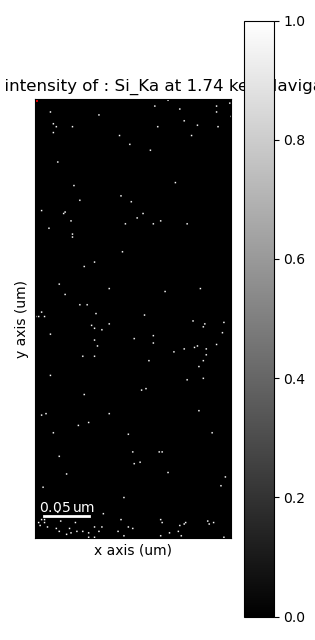

In [39]:
maps[2].plot()

/dls_sw/apps/python/miniforge/4.10.0-0/envs/epsic3.10/lib/python3.10/site-packages/hyperspy/drawing/utils.py:1305: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.9, 1])


[<Axes: title={'center': 'Ge_Ka at 9.89 keV'}, xlabel='x axis (um)', ylabel='y axis (um)'>,
 <Axes: title={'center': 'O_Ka at 0.52 keV'}, xlabel='x axis (um)', ylabel='y axis (um)'>,
 <Axes: title={'center': 'Si_Ka at 1.74 keV'}, xlabel='x axis (um)', ylabel='y axis (um)'>,
 <Axes: title={'center': 'Ti_Ka at 4.51 keV'}, xlabel='x axis (um)', ylabel='y axis (um)'>]

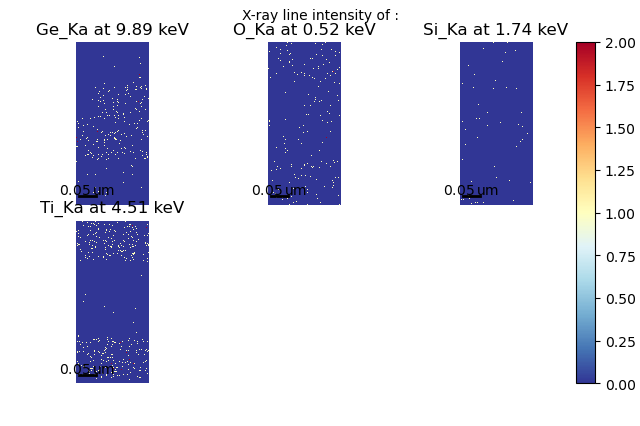

In [40]:
hs.plot.plot_images(hs.transpose(maps[0], maps[1], maps[2], maps[3]),
                    tight_layout=True, cmap='RdYlBu_r', axes_decor='off',
                    colorbar='single', scalebar='all',
                    scalebar_color='black', suptitle_fontsize=10,
                    padding={'top':0.9, 'bottom':0.10, 'left':0.05,
                             'right':0.9, 'wspace':0.20, 'hspace':0.10})

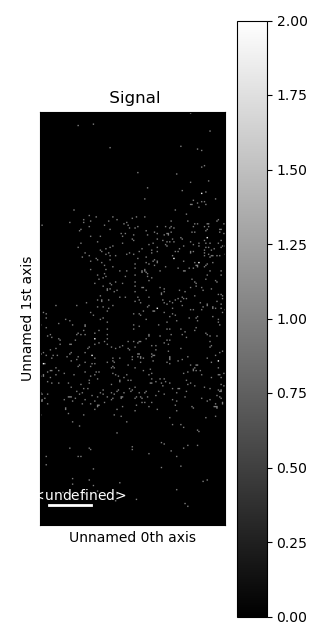

In [41]:
a_map = hs.signals.Signal2D(maps[0])
a_map.plot()

In [42]:
# copy over map calibrations 
a_map.axes_manager[0].scale = edx.axes_manager['x'].scale 
a_map.axes_manager[1].scale = edx.axes_manager['y'].scale 

a_map.axes_manager[0].units = edx.axes_manager['x'].units 
a_map.axes_manager[1].units = edx.axes_manager['y'].units 

In [43]:
a_map.axes_manager

Signal axis name,size,,offset,scale,units
,134,,0.0,0.0016451380215585232,um
,299,,0.0,0.0016451380215585232,um


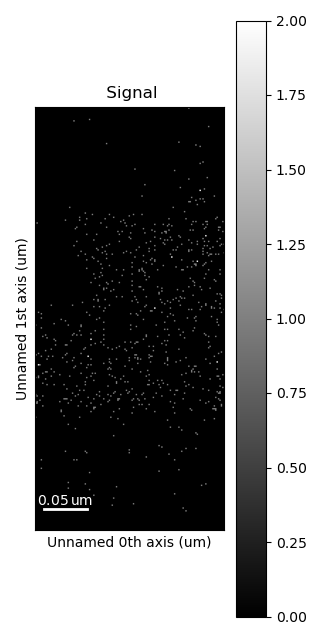

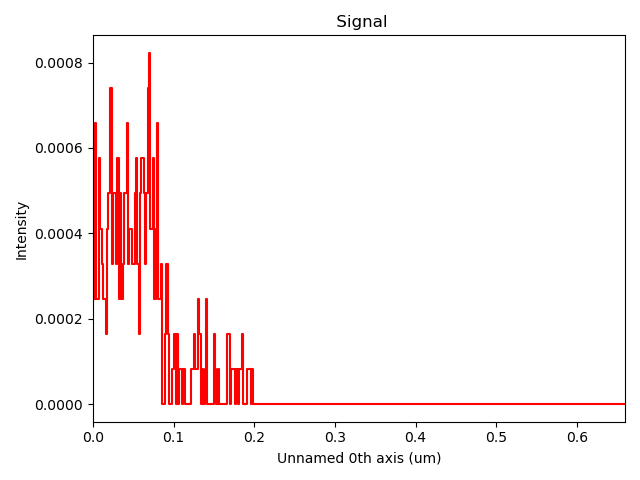

In [44]:
#linescan 
ls_roi = hs.roi.Line2DROI(x1=0.207287, y1=0.269803, x2=0.203997, y2=0.931148, linewidth=20)
a_map.plot(cmap = 'gray')
this_line = ls_roi.interactive(a_map)#(eds_maps[1])
this_line.plot()

In [45]:
ls_roi

Line2DROI(x1=0.11845, y1=0.144772, x2=0.11516, y2=0.365221, linewidth=19.9999)